## Again, load up the libraries and data

In [90]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot
import os
import re

## here we'll set the matplotlib figure size to take up more real estate
pyplot.rcParams['figure.figsize'] = [12, 5]

outputFiles = os.listdir('../output')
output = dict()
for outputFile in outputFiles:
    with open("../output/" + outputFile, 'r') as f:
        output[outputFile] = dict()
        for cnt, line in enumerate(f):
            split = line.split()
            if len(split) > 1:
                output[outputFile][split[0]] = pd.Series(split[1:])
            
print output.keys()

['cashier_1000_20.output', 'cashier_1000_14.output', 'cashier_1000_26.output', 'cashier_1000_22.output', 'cashier_1000_6.output', 'cashier_1000_24.output']


## Lets take a look at the 22 cashier configuration again. This time we have run 10 simulations. Lets graph any solutions that have a max wait time larger than 10 minutes.

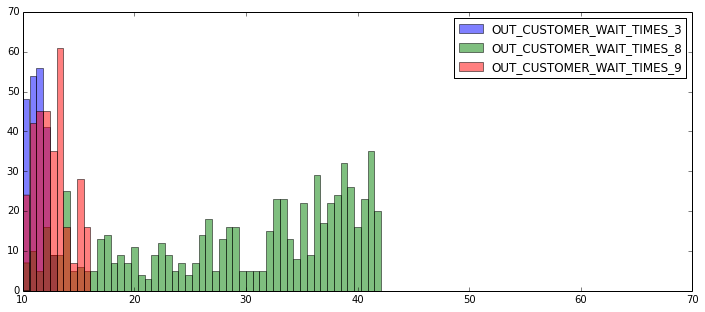

In [98]:
bins = np.linspace(10, 70, 100)
waitTimeKeys = filter(lambda k: k.startswith('OUT_CUSTOMER_WAIT_TIMES'), output['cashier_1000_22.output'].keys())
for key, waitTimes in {key: output['cashier_1000_22.output'][key].astype(float) for key in waitTimeKeys}.iteritems():
    if waitTimes.max() > 10:
        pyplot.hist(waitTimes, bins, alpha=0.5, label=key)
pyplot.legend(loc='upper right')
pyplot.show()

## We see here that there are 3 solutions with wait times larger than 10 minutes, but only one that has several wait times over 15 minutes: solution #8.

In [99]:
## Lets see what the wait times look like in a 24 cashier scenario.

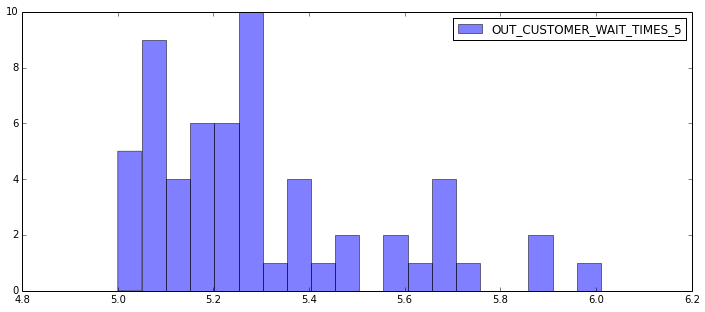

In [100]:
bins = np.linspace(5, 10, 100)
waitTimeKeys = filter(lambda k: k.startswith('OUT_CUSTOMER_WAIT_TIMES'), output['cashier_1000_24.output'].keys())
for key, waitTimes in {key: output['cashier_1000_24.output'][key].astype(float) for key in waitTimeKeys}.iteritems():
    if waitTimes.max() > 5:
        pyplot.hist(waitTimes, bins, alpha=0.5, label=key)
pyplot.legend(loc='upper right')
pyplot.show()

## Here we see a single solution with wait times over 5 minutes, but no wait times over ~6 minutes exist in the solutions.